In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, len(x)+1)/n
    return x,y

def plot_ecdf(df):
    ETD_orders = df.delta_est_ord_arrive_time.tolist()
    True_EDT_orders = df.delta_ord_arrive_time.tolist()
    model_ETD_orders = df.our_model_predict.tolist()
    
    x_est_ETD, y_est_ETD = ecdf(ETD_orders)
    x_ETD, y_ETD = ecdf(True_EDT_orders)
    x_model_ETD, y_model_ETD = ecdf(model_ETD_orders)
    
    _ = plt.plot(x_ETD, y_ETD)
    _ = plt.plot(x_est_ETD, y_est_ETD)
    _ = plt.plot(x_model_ETD, y_model_ETD)
    _ = plt.title('for {}'.format(df.customer_state.tolist()[-1]))
    _ = plt.legend(['True ETD', 'EST ETD', 'model ETD predict'])
    
    _ = plt.show()
    

    
def draw_ecdf_models(df):
    states = X_test.customer_state.unique().tolist()  

    for s in states:
        plot_ecdf(df[clean_data.customer_state == s])

In [24]:
sellers_data = pd.read_csv('../input/olist_sellers_dataset.csv')
product_cat = pd.read_csv('../input/product_category_name_translation.csv')
orders_dataset = pd.read_csv('../input/olist_orders_dataset.csv')
order_items_dataset = pd.read_csv('../input/olist_order_items_dataset.csv')
customers_dataset = pd.read_csv('../input/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('../input/olist_geolocation_dataset.csv')
order_payments_dataset = pd.read_csv('../input/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('../input/olist_order_reviews_dataset.csv')
products_dataset = pd.read_csv('../input/olist_products_dataset.csv')




## Improve ETD accuracy

Build model which predict for items withing range of 7 days. In order to do that we have to
- assembly the part which is primary needed for prediction.
- drop their prediction columns since it has a large shift.
- drop Nan
- drop any delivery with status canceled 
- drop any orders for which time taken to postal office is more than 7 days


In [27]:
df_all = pd.merge(orders_dataset, customers_dataset, on='customer_id')
df_all = pd.merge(order_items_dataset, df_all, on='order_id')

In [28]:
if 'order_estimated_delivery_date' in df_all.columns:
    df_all.drop(columns=['order_estimated_delivery_date'], inplace=True)

In [29]:
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all.order_purchase_timestamp)

In [ ]:
clean_data = df_all.dropna()
clean_data = clean_data[clean_data.order_status == 'delivered']

In [32]:
clean_data['shipping_limit_date'] = pd.to_datetime(clean_data.shipping_limit_date)
clean_data['order_approved_at'] = pd.to_datetime(clean_data.order_approved_at)
clean_data['order_delivered_carrier_date'] = pd.to_datetime(clean_data.order_delivered_carrier_date)
clean_data['order_delivered_customer_date'] = pd.to_datetime(clean_data.order_delivered_customer_date)

In [61]:
clean_data['it_took'] = clean_data.order_approved_at - clean_data.order_purchase_timestamp 

In [64]:
mask = clean_data.order_approved_at - clean_data.order_purchase_timestamp 
clean_data[mask > pd.to_timedelta("10 day")] #we can conclude that there are 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,it_took
655,0184d4ddb259e1a4cfc2871888cf97b8,1,aa8627a375771ab01288705307ec4ae5,e333046ce6517bd8bb510291d44f0130,2017-09-07 22:31:42,75.00,16.16,09425ea1839abf2f0d289a0ff453fa21,delivered,2017-09-01 20:04:28,2017-09-13 22:17:15,2017-09-04 14:05:50,2017-09-09 15:12:44,10c573ba276f9857dc6820e0dde57fb8,14811,araraquara,SP,12 days 02:12:47
3069,06eb87385425e5797a1a5c2cdb1b6559,1,419538c5c0c21d892928586bee1ea16a,da8622b14eb17ae2831f4ac5b9dab84a,2017-09-07 22:31:16,199.90,26.24,3bf91fb0570071bd0857ff3d97461f71,delivered,2017-09-01 18:53:08,2017-09-13 22:10:37,2017-09-06 21:10:11,2017-09-15 18:53:50,7c7e03430298829ba514c008192e2f7d,71937,brasilia,DF,12 days 03:17:29
4693,0a93b40850d3f4becf2f276666e01340,1,c6e513054b982283c1cbbb2a45d02d83,f8db351d8c4c4c22c6835c19a46f01b0,2018-02-26 11:51:27,22.90,15.10,a70076d8d4bfce15f8081951c43bf187,delivered,2018-01-20 14:24:50,2018-02-20 11:51:27,2018-02-21 19:34:13,2018-03-02 22:37:49,a27e4166e532a9f96b33021546df3c38,93700,campo bom,RS,30 days 21:26:37
5323,0c1426109d8295a688ee4182016bba59,1,cfb133b7458336455fa60b97ac3aaba9,3d871de0142ce09b7081e2b9d1733cb1,2017-12-13 09:50:08,45.00,16.11,d5114ea20c2a52447a40aa1e87bfd5cd,delivered,2017-11-24 21:24:29,2017-12-07 09:50:08,2017-12-08 18:15:14,2017-12-14 19:48:30,f9425b912468993ef72b5056801b1957,87210,cianorte,PR,12 days 12:25:39
8532,1378f9601350615613cc8832d6789c5d,1,7307a453add3ce026e86d325ff2d60cd,f5f2ab9bdb6b30c14c61be68c5ed37da,2017-09-07 22:32:05,106.90,18.00,988126b4ddf725d9724e4318872ea2ae,delivered,2017-09-01 20:28:02,2017-09-13 22:03:51,2017-09-04 18:07:55,2017-09-13 22:24:46,507dc9becd4fc65635d90682dfa9d3a3,98900,santa rosa,RS,12 days 01:35:49
9150,14ef2221cc3570aa6ce512fc353529b3,1,cf6514025ef5d3a93d69d2a7bfa4036b,d2374cbcbb3ca4ab1086534108cc3ab7,2018-03-02 11:15:51,17.90,11.85,c319e614bd117152d6919546633c9cc4,delivered,2018-02-09 09:27:56,2018-02-22 11:15:51,2018-02-24 02:53:01,2018-03-03 16:49:00,d976eba1bfc27a22c5ce89e23a000367,3676,sao paulo,SP,13 days 01:47:55
13918,1fab4ac9d85079b3da72a11475ae1685,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2017-09-07 22:31:41,229.90,13.11,f831c1fa80308975ec2b58e4877328e0,delivered,2017-09-01 19:04:22,2017-09-13 22:06:11,2017-09-04 13:10:23,2017-09-08 20:13:03,d121ceaccf4c241eae9a5f97cc661ccf,13610,leme,SP,12 days 03:01:49
15789,241adc087f5732067fc042dceb9cc6da,1,23e8820ae7d5a7aee1299a1923876b78,855668e0971d4dfd7bef1b6a4133b41b,2018-03-09 09:06:52,50.00,9.34,8bac337f299a513e8c90b9fe96b12dd1,delivered,2018-02-07 11:48:20,2018-02-19 09:06:52,2018-03-02 17:23:28,2018-03-06 01:05:18,2dd7f52683f631651a5d94056935e1e1,4563,sao paulo,SP,11 days 21:18:32
28495,40de47dfa620d667117e4a6067b6e1ec,1,d678178aa4291cd25a755a90188375c8,1025f0e2d44d7041d6cf58b6550e0bfa,2017-09-10 22:33:43,38.40,15.10,9f64391c68c234a7264087c2d0c1ac76,delivered,2017-09-01 20:05:55,2017-09-13 21:58:38,2017-09-04 20:36:58,2017-09-08 20:41:16,2d32acd3ec65cdd1da5ef425e03d0fda,38406,uberlandia,MG,12 days 01:52:43
28496,40de47dfa620d667117e4a6067b6e1ec,2,d678178aa4291cd25a755a90188375c8,1025f0e2d44d7041d6cf58b6550e0bfa,2017-09-10 22:33:43,38.40,15.10,9f64391c68c234a7264087c2d0c1ac76,delivered,2017-09-01 20:05:55,2017-09-13 21:58:38,2017-09-04 20:36:58,2017-09-08 20:41:16,2d32acd3ec65cdd1da5ef425e03d0fda,38406,uberlandia,MG,12 days 01:52:43


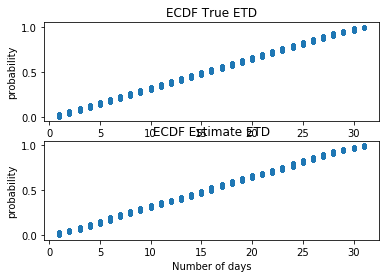

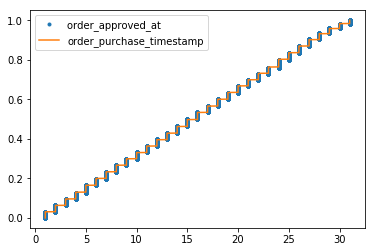

In [57]:
ETD_orders = clean_data.order_approved_at.dt.day.tolist()
True_EDT_orders = clean_data.order_purchase_timestamp.dt.day.tolist()

x_est_ETD, y_est_ETD = ecdf(ETD_orders)
x_ETD, y_ETD = ecdf(True_EDT_orders)


plt.plot()

plt.subplot(2,1,1)
plt.title('ECDF True ETD')
plt.xlabel('Number of days')
plt.ylabel('probability')
plt.plot(x_ETD,y_ETD, marker='.', linestyle='none')

plt.subplot(2,1,2)
plt.title('ECDF Estimate ETD')
plt.xlabel('Number of days')
plt.ylabel('probability')
plt.plot(x_est_ETD, y_est_ETD, marker='.', linestyle='none')

plt.show()


plt.plot(x_est_ETD, y_est_ETD, marker='.', linestyle='none')
plt.plot(x_ETD,y_ETD)

plt.legend(['order_approved_at ','order_purchase_timestamp'])
plt.show()





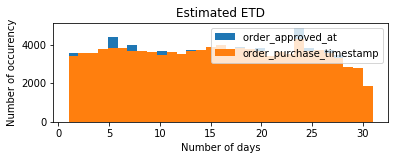

In [58]:
plt.subplot(2,1,1)
plt.title('Estimated ETD')
plt.xlabel('Number of days')
plt.ylabel('Number of occurency')
plt.hist(ETD_orders, bins=max(True_EDT_orders))

# plt.subplot(2,1,2)
# plt.title('True ETD')
# plt.xlabel('Number of days')
# plt.ylabel('Number of occurency')
plt.hist(True_EDT_orders, bins=max(True_EDT_orders))
plt.legend(['order_approved_at ','order_purchase_timestamp'])






plt.show()

The aim of this EDA is to study the shape of data

In [14]:
clean_data['delta_ord_arrive_time'] = (clean_data.order_delivered_customer_date - clean_data.order_purchase_timestamp) - pd.to_timedelta('7 day')
clean_data['delta_est_ord_arrive_time'] = (clean_data.order_estimated_delivery_date - clean_data.order_approved_at) - pd.to_timedelta('7 day')
clean_data['delta_true_time_est_time'] = (clean_data.order_delivered_carrier_date - clean_data.order_estimated_delivery_date) pd.to_timedelta('7 day')



SyntaxError: invalid syntax (<ipython-input-14-5e8fc4f57569>, line 3)

In [ ]:
withing_aweek = clean_data [ clean_data.delta_ord_arrive_time.abs() < 8]

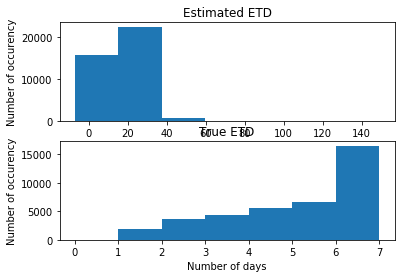

In [23]:
ETD_orders = withing_aweek.delta_est_ord_arrive_time.tolist()
True_EDT_orders = withing_aweek.delta_ord_arrive_time.tolist()

plt.subplot(2,1,1)
plt.title('Estimated ETD')
plt.xlabel('Number of days')
plt.ylabel('Number of occurency')
plt.hist(ETD_orders, bins=max(True_EDT_orders))

plt.subplot(2,1,2)
plt.title('True ETD')
plt.xlabel('Number of days')
plt.ylabel('Number of occurency')
plt.hist(True_EDT_orders, bins=max(True_EDT_orders))



plt.show()

how does the day of the week are affecting the result

##  Pick better fulfillment plans, better meaning "faster" or "cheaper"


In [21]:
# code goes below
# find the min of time which takes to an item to arrive

## Improve conversion and maximize revenue by dynamically pricing premium delivery options for loyal customers

In [22]:
# code goes below

In [23]:
# reference https://www.kaggle.com/lukio43/a-simple-analysis-of-delayed-orders
# https://blog.postmates.com/estimating-delivery-times-a-case-study-in-practical-machine-learning-e70f677e736c
# try to predict the optimal waiting time before an item has been shifted